# Full Course: How to  Build a Machine Learning model for Regression (Simple English)

## Step 1: Load the data
First, we need to get our data ready. It's like getting the ingredients from the fridge before you bake a cake. We use already-built tools (like the data and oother "functions") to start working with it.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_diabetes

# Step 1 : Load the example dataset about diabetes
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='progression')

# Display the 5 rows of the data:
print("5 first rows, display :")
display(X.head())
print("First 5 target values :")
display(y.head())

5 first rows, display :


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


First 5 target values :


0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: progression, dtype: float64

Now we have our "ingredients" (the data), let's take a good look at what we have before starting

## Understanding the data : EDA (Exploratory Data Analysis)
You wouldn't start baking before checking if your eggs are fresh or if you have ennough flour. With data, we first look for any surprises or problems, or bad measurements. This helps us avoid trouble later

In [2]:
print("---How many rows and columns do we have ?")
print("Rows:", X.shape[0], "Columns:", X.shape[1])

print("\n---Info about each column:")
print(X.info())

print("\n---Some basic statistics (mean, min, max, etc.)")
display(X.describe())

print("\n---Any missing values?")
print(X.isna().sum())

print("\n---Stats for target (what are we going to predict):")
print(y.describe())

---How many rows and columns do we have ?
Rows: 442 Columns: 10

---Info about each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None

---Some basic statistics (mean, min, max, etc.)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01



---Any missing values?
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

---Stats for target (what are we going to predict):
count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: progression, dtype: float64


### Visual EDA
We also use charts to get an even better overview!

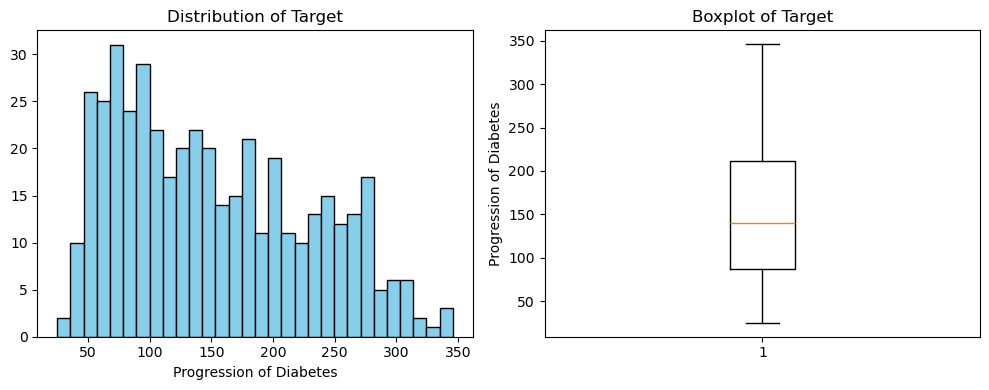

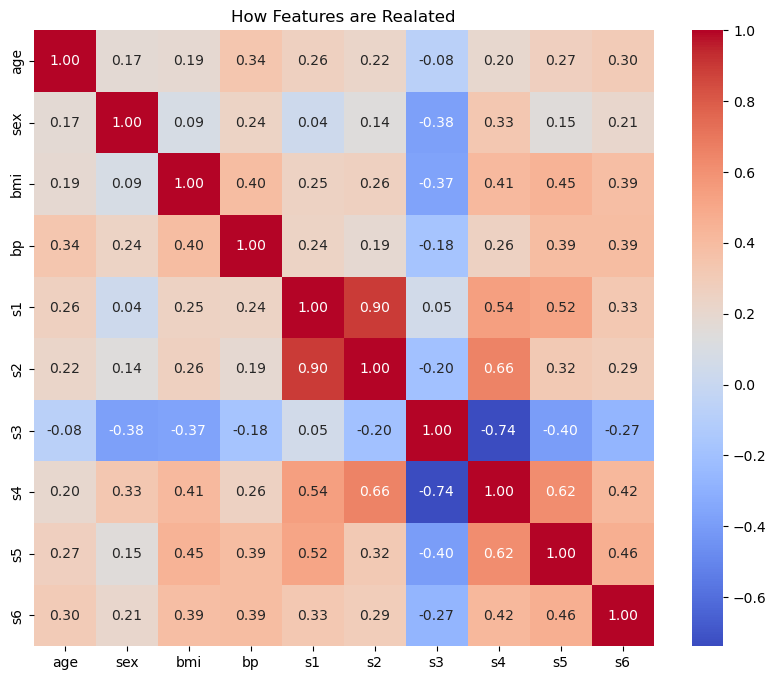

In [12]:
# Ensure plots render in the notebook
%matplotlib inline

# Chart: What values does our target take?
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y, bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Progression of Diabetes')
plt.title('Distribution of Target')

plt.subplot(1, 2, 2)
plt.boxplot(y, vert=True)
plt.ylabel('Progression of Diabetes')
plt.title('Boxplot of Target')
plt.tight_layout()
plt.show()

# Chart: Are any of our features related?
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("How Features are Realated")
plt.show()

## Preparing the data: Clean and split 

Before mixing ingredients, we sometimes wash and cut them - the same goes for data. We also need to set some data aside so we can check later if our model is doing a good job and not just memorizing. This way, we're ready for the next step.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data: 80% for teaching (training) and 20% for checking (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features so they big numbers won't take advantage on smallest and compromise the learning,
# (like making a normal distribution: avg=0, std=1)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Rows for training:", X_train.shape[0])
print("Rows for testing:", X_test.shape[0])
print("\nBefore transform :\n", X_train.head())
print("\nAfter transform :\n", x_train_scaled[:5]) # The first 5 lines transformed. NB : It's an array (numpy) now, not a dataframe (pandas)

Rows for training: 353
Rows for testing: 89

Before transform :
           age       sex       bmi        bp        s1        s2        s3  \
17   0.070769  0.050680  0.012117  0.056301  0.034206  0.049416 -0.039719   
66  -0.009147  0.050680 -0.018062 -0.033213 -0.020832  0.012152 -0.072854   
137  0.005383 -0.044642  0.049840  0.097615 -0.015328 -0.016345 -0.006584   
245 -0.027310 -0.044642 -0.035307 -0.029770 -0.056607 -0.058620  0.030232   
31  -0.023677 -0.044642 -0.065486 -0.081413 -0.038720 -0.053610  0.059685   

           s4        s5        s6  
17   0.034309  0.027364 -0.001078  
66   0.071210  0.000272  0.019633  
137 -0.002592  0.017036 -0.013504  
245 -0.039493 -0.049872 -0.129483  
31  -0.076395 -0.037129 -0.042499  

After transform :
 [[ 1.49836523  1.06136988  0.21990201  1.13887373  0.72847289  1.05589332
  -0.82445065  0.71103773  0.54748197 -0.06144896]
 [-0.22885822  1.06136988 -0.41936607 -0.71059105 -0.4249289   0.27242452
  -1.52979055  1.4842858  -0.01975653

Now our data is clean, in the right shape, and split for teaching and checking. That means we're ready to teach the computer.
## Building and Training the Model
Teaching the computer data is like drawing the best straight linr through a cloud of dots. This straight line helps us guess new values later on. Right now, we ask our computer to find that line using the training data.

In [9]:
from sklearn.linear_model import LinearRegression

# Build an train (fit) the model
model = LinearRegression()
model.fit(x_train_scaled, y_train)
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.2f}")
    print(f"Intercept: {model.intercept_:.2f}")

  age: 1.75
Intercept: 153.74
  sex: -11.51
Intercept: 153.74
  bmi: 25.61
Intercept: 153.74
  bp: 16.83
Intercept: 153.74
  s1: -44.45
Intercept: 153.74
  s2: 24.64
Intercept: 153.74
  s3: 7.68
Intercept: 153.74
  s4: 13.14
Intercept: 153.74
  s5: 35.16
Intercept: 153.74
  s6: 2.35
Intercept: 153.74


## 5. Making predictions
This is like giving the computer new dots and asking where they would land on our straight line. Let's compare what the computer guesses to what really happened. 

In [11]:
y_pred = model.predict(X_test_scaled)
comparison = pd.DataFrame({
    'Real': y_test.values, 
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})

print("First 10 predictions vs real values:")
display(comparison.head(10))

First 10 predictions vs real values:


,Real,Predicted,Difference
287,219.0,139.547558,79.452442
211,70.0,179.517208,-109.517208
72,202.0,134.038756,67.961244
321,230.0,291.417029,-61.417029
73,111.0,123.789659,-12.789659
418,84.0,92.172347,-8.172347
367,242.0,258.232389,-16.232389
354,272.0,181.337321,90.662679
281,94.0,90.224113,3.775887
148,96.0,108.633759,-12.633759


### Metrics (to evaluate how well its predicts)
Here we will use **mean_absolute_error** to high-quantify the difference and **r2_score** to see how well its predicts the real values (~1 means that it predicts well).

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Numeric model performance:")
print(f"MAE (average error): {mae:.2f} (lower => better)")
print(f"R² (explained variance): {mae:.2f} (1 => perfect ; 0 is guessing ())")